In [3]:
import pandas # a libray for data structure
import numpy #a library for arrays
import matplotlib.pyplot as plt # a module for plotting

# import seaborn
# import statsmodels.api as sm

In [4]:
data=pandas.read_csv(r'birthwt.csv', low_memory=False)
# low_memory=false is for efficiency purposes

# data is a dataframe from pandas

print(len(data)) # find out how many rows of data
print(len(data.columns)) # find out how many columns of data 

189
11


In [ ]:
print(data.columns)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()
# default gives you first 5 rows if unspecified

,Unnamed: 0,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,85,0,19,182,2,0,0,0,1,0,2523
1,86,0,33,155,3,0,0,0,0,3,2551
2,87,0,20,105,1,1,0,0,0,1,2557
3,88,0,21,108,1,1,0,0,1,2,2594
4,89,0,18,107,1,1,0,0,1,0,2600


In [11]:
data.head(8)

,Unnamed: 0,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,85,0,19,182,2,0,0,0,1,0,2523
1,86,0,33,155,3,0,0,0,0,3,2551
2,87,0,20,105,1,1,0,0,0,1,2557
3,88,0,21,108,1,1,0,0,1,2,2594
4,89,0,18,107,1,1,0,0,1,0,2600
5,91,0,21,124,3,0,0,0,0,0,2622
6,92,0,22,118,1,0,0,0,0,1,2637
7,93,0,17,103,3,0,0,0,0,1,2637


In [12]:
# Select specific columns from the bigger data set
# code here means from pandas import Dataframe
dfb=pandas.DataFrame(data, columns=['low', 'lwt', 'smoke', 'ftv', 'bwt'])

In [13]:
dfb.head()

,low,lwt,smoke,ftv,bwt
0,0,182,0,0,2523
1,0,155,0,3,2551
2,0,105,1,1,2557
3,0,108,1,2,2594
4,0,107,1,0,2600


In [14]:
# check the smoke values of the first 5 rows

smoke_values=dfb.head()['smoke']
print(smoke_values)

0    0
1    0
2    1
3    1
4    1
Name: smoke, dtype: int64


In [15]:
# convert string to numeric

# counting what smoke values appear how many times in the first 5 rows, use the value_counts function
# here, value 1 appears 3 times, and value 0 appears 2 times
smoke_count = dfb.head()['smoke'].value_counts() #sort=False
print(smoke_count)

1    3
0    2
Name: smoke, dtype: int64


In [16]:
# convert string to numeric
ftv_count = dfb['ftv'].value_counts(sort=False)
print(ftv_count)

0    100
1     47
2     30
3      7
4      4
6      1
Name: ftv, dtype: int64


In [17]:
# convert the ftv values to numeric just to be safe
# if the values are only 0 or 1, it's categorical, like smoke. Otherwise, convert to numeric to be safe


dfb['ftv']=pandas.to_numeric(dfb['ftv'])
ftv_count = dfb['ftv'].value_counts(sort=False)
print(ftv_count)

# if numeric data
# first, data['RAD']=pandas.to_numeric(data['RAD'])
# then, v_count=data['RAD'].value_counts(sort=False)

0    100
1     47
2     30
3      7
4      4
6      1
Name: ftv, dtype: int64


In [18]:
# count for lwt
lwt_count = dfb['lwt'].value_counts(sort=False, normalize=True) # normalize=True gives you the percentage instead of amount
print('Lwt Distribution:', lwt_count, sep='\n')

Lwt Distribution:
80     0.005291
85     0.010582
89     0.005291
90     0.015873
91     0.005291
92     0.005291
94     0.005291
95     0.031746
96     0.005291
97     0.005291
98     0.005291
100    0.026455
101    0.005291
102    0.010582
103    0.015873
105    0.037037
107    0.010582
108    0.005291
109    0.010582
110    0.058201
112    0.021164
113    0.015873
115    0.037037
116    0.005291
117    0.010582
118    0.010582
119    0.015873
120    0.089947
121    0.021164
122    0.010582
         ...   
141    0.005291
142    0.010582
147    0.010582
148    0.005291
150    0.026455
153    0.005291
154    0.010582
155    0.015873
158    0.010582
160    0.010582
165    0.005291
167    0.005291
168    0.005291
169    0.010582
170    0.021164
175    0.005291
182    0.005291
184    0.005291
185    0.005291
186    0.005291
187    0.010582
189    0.005291
190    0.010582
200    0.005291
202    0.005291
215    0.005291
229    0.005291
235    0.005291
241    0.005291
250    0.005291
Name: 

In [19]:
#  count for lwt using groupby function
# same result as the above cell if didn't include normalize=True

x=data.groupby('lwt').size()
#x=data.groupby('ftv').size()*100/len(data)
print(x)

lwt
80      1
85      2
89      1
90      3
91      1
92      1
94      1
95      6
96      1
97      1
98      1
100     5
101     1
102     2
103     3
105     7
107     2
108     1
109     2
110    11
112     4
113     3
115     7
116     1
117     2
118     2
119     3
120    17
121     4
122     2
       ..
141     1
142     2
147     2
148     1
150     5
153     1
154     2
155     3
158     2
160     2
165     1
167     1
168     1
169     2
170     4
175     1
182     1
184     1
185     1
186     1
187     2
189     1
190     2
200     1
202     1
215     1
229     1
235     1
241     1
250     1
dtype: int64


In [25]:
import seaborn

# make sure that this package is installed
# close jupyter notebook including the terminal running in a background window
# open terminal program on mac (or equivalent in Windows)
# type the following command "conda install seaborn"
# follow the prompts
# this should work for most packages
# more on seaborn at: https://stanford.edu/~mwaskom/software/seaborn/

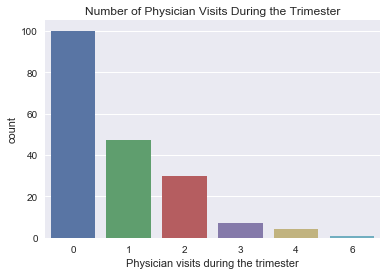

In [26]:
%matplotlib inline
seaborn.countplot(x='ftv', data=dfb) # x here means x-axis, pulling from the data called dfb
plt.xlabel("Physician visits during the trimester")
plt.title("Number of Physician Visits During the Trimester")

C:\Users\kary\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


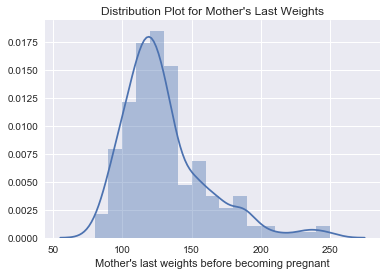

In [31]:
# seaborn.distplot(dfb['lwt'])
# seaborn.distplot(dfb['lwt'].dropna(), kde=False)
seaborn.distplot(dfb['lwt'].dropna())
# dropna() function drops rows with null values
plt.title("Distribution Plot for Mother's Last Weights")
plt.xlabel("Mother's last weights before becoming pregnant")

In [32]:
dfb['lwt'].describe()

count    189.000000
mean     129.814815
std       30.579380
min       80.000000
25%      110.000000
50%      121.000000
75%      140.000000
max      250.000000
Name: lwt, dtype: float64

In [33]:
dfb['lwt'].mean()
# other descriptive stats as well

129.8148148148148

In [34]:
dfb['lwt'].max()

250

In [35]:
dfb['ftv'].describe()

count    189.000000
mean       0.793651
std        1.059286
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: ftv, dtype: float64

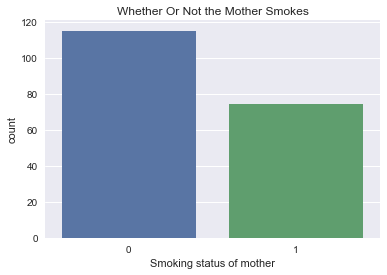

In [37]:
# Is there a problem in the descriptive stats above?
# knowledge of basic stats is essential in figuring out appropriate desc. measures

%matplotlib inline
seaborn.countplot(x='smoke', data=dfb)
plt.xlabel("Smoking status of mother")
plt.title("Whether Or Not the Mother Smokes")

In [39]:
# smoke is a categorical variable
# Next step is to designate appropriate variables as categorical

dfb['smoke']=dfb['smoke'].astype('category') # set smoke as categorical type instead of numerical
dfb['smoke']=dfb['smoke'].cat.rename_categories(["No", "Yes"]) # rename the categories

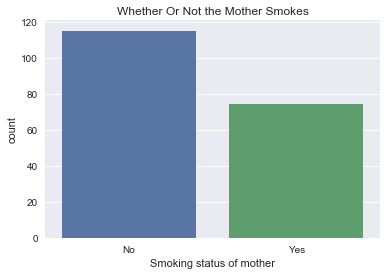

In [40]:
# Is there a problem in the descriptiveats above?

%matplotlib inline
seaborn.countplot(x='smoke', data=dfb)
plt.xlabel("Smoking status of mother")
plt.title("Whether Or Not the Mother Smokes")

In [41]:
dfb['smoke'].describe()

count     189
unique      2
top        No
freq      115
Name: smoke, dtype: object

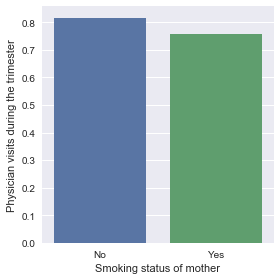

In [42]:
# plot for two variables - one on X and the other on Y

seaborn.factorplot(x='smoke', y='ftv', data=dfb, kind='bar', ci=None)  # ci refers to error bars
plt.xlabel("Smoking status of mother")
plt.ylabel('Physician visits during the trimester')

In [ ]:
# General Workflow
# Get the data (from csv, web etc)
# Get a sense of the data by 
    # examine few rows (df.head(), for example)
    # data cleaning/manipulation (missing data, data from multiple sources) 
    # figure out the level of the variable (categorical or numeric)
    # Sometimes you may need to assign some variables to be explicitly numeric (for example, RAD above)... 
        # ... while others as categorical (for example, CHAS above)
    # get them done in the beginning before starting data analysis
        # we did not do this here for pedagogical reasons
# pandas is very good for the steps above; pandas, scipy and viz. packages for steps below
# What is/are your target variable? what are your predictors?
# Understand descriptive stats, distributions etc (sometimes using visualizations)
# choose a stats model; run the model; evaluate the model (use scipy package; or even R after exporting the data)


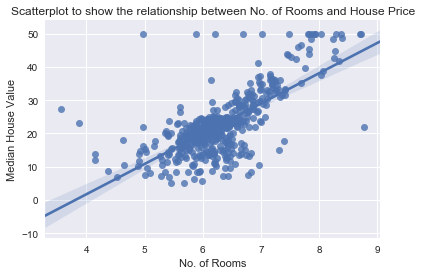

In [25]:
# regplot (2 variables)

seaborn.regplot(x='RM', y='MEDV', data=dfb, fit_reg=True)  # ci refers to error bars
plt.xlabel("No. of Rooms")
plt.ylabel('Median House Value')
plt.title("Scatterplot to show the relationship between No. of Rooms and House Price")

In [26]:
# stats knowledge - look at the value around y=50; implication?

In [43]:
dfb.corr()

,low,smoke,ftv,bwt
low,1.000000,0.161404,-0.062960,-0.784805
smoke,0.161404,1.000000,-0.028013,-0.190448
ftv,-0.062960,-0.028013,1.000000,0.058318
bwt,-0.784805,-0.190448,0.058318,1.000000


In [28]:
# stats component from scipy is now a separate package
# scipy is a broader package for doing a range of computations
# people typically use python for data manipulation
# use R/stats packages for data analysis; however, python for programming chops

import statsmodels.api as sm

In [29]:
result=sm.OLS(dfb['MEDV'], dfb['RM']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Thu, 20 Apr 2017   Prob (F-statistic):          3.74e-256
Time:                        16:06:40   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# other datasets
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# http://statweb.stanford.edu/~sabatti/data.html
